# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


In [3]:
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

#output: Number of cities in the list: 593

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | dunedin
Processing Record 4 of Set 1 | ke-macina
Processing Record 5 of Set 1 | sabt alalayah
City not found. Skipping...
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | san antonio de pale
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | haiku-pauwela
Processing Record 11 of Set 1 | tazacorte
Processing Record 12 of Set 1 | khovd
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | hizan
Processing Record 15 of Set 1 | harper
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | hamilton
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | chonchi
Processing Record 20 of Set 1 | st. john's
Processing Record 21 of Set 1

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,6.77,89,98,15.09,TF,1738272343
1,waitangi,-43.9535,-176.5597,16.57,77,11,3.58,NZ,1738272344
2,dunedin,-45.8742,170.5036,16.56,65,84,1.79,NZ,1738272345
3,ke-macina,13.9623,-5.3572,25.61,12,37,4.64,ML,1738272346
4,puerto ayora,-0.7393,-90.3518,26.42,92,40,2.24,EC,1738272349


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.77,89,98,15.09,TF,1738272343
1,waitangi,-43.9535,-176.5597,16.57,77,11,3.58,NZ,1738272344
2,dunedin,-45.8742,170.5036,16.56,65,84,1.79,NZ,1738272345
3,ke-macina,13.9623,-5.3572,25.61,12,37,4.64,ML,1738272346
4,puerto ayora,-0.7393,-90.3518,26.42,92,40,2.24,EC,1738272349


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

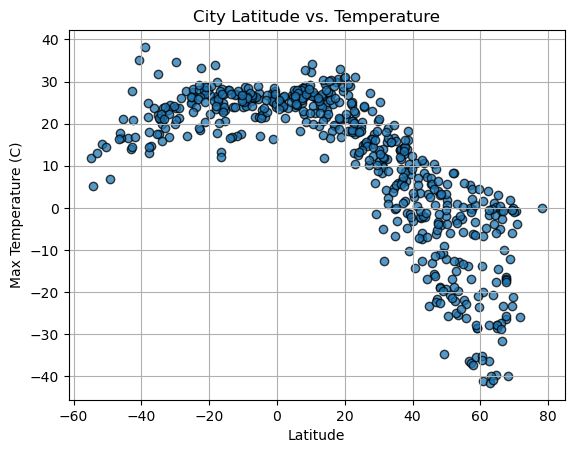

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

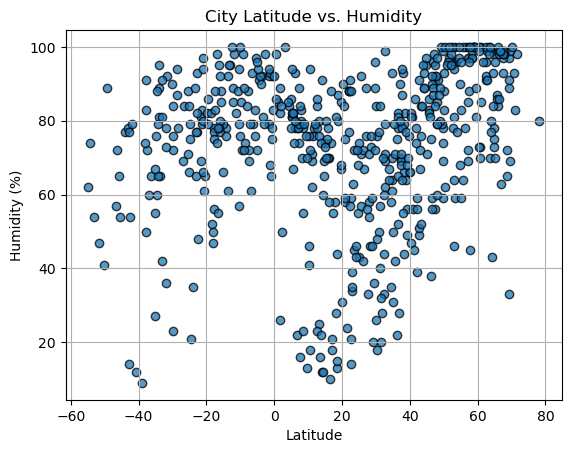

In [18]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

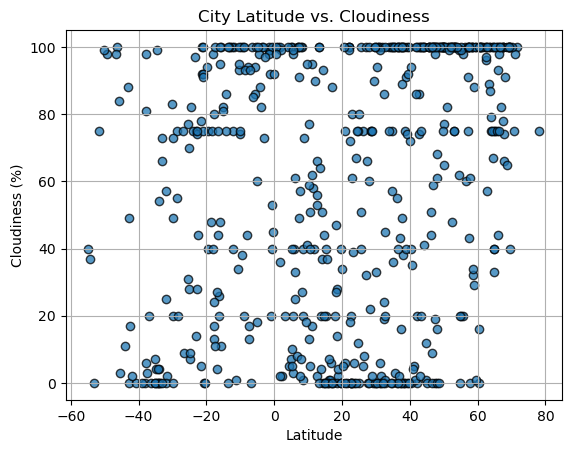

In [19]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

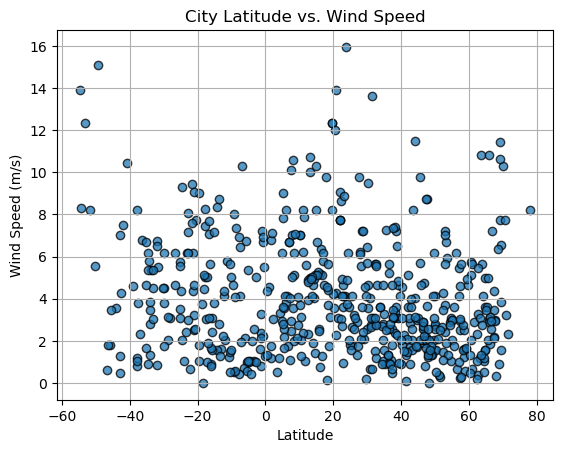

In [20]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
def myfunction(x_value, y_value):
    # Perform linear regression
    slope, intercept, rvalue, p, std_err = stats.linregress(x_value, y_value)
    
    # Get regression values
    regress_values = x_value * slope + intercept
    line_equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    return regress_values, line_equation, rvalue 

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_data_df.loc[city_data_df['Lat'] >= 0]
northern_hemi_df = pd.DataFrame(northern_hemi)
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,ke-macina,13.9623,-5.3572,25.61,12,37,4.64,ML,1738272346
8,haiku-pauwela,20.9219,-156.3051,26.76,75,75,13.89,US,1738272354
9,tazacorte,28.6290,-17.9293,17.54,73,75,7.20,ES,1738272355
10,khovd,48.0056,91.6419,-18.84,79,68,1.21,MN,1738272356
11,hizan,38.2257,42.4278,-1.16,44,0,3.37,TR,1738272359


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi = city_data_df.loc[city_data_df['Lat'] < 0]
southern_hemi_df = pd.DataFrame(southern_hemi)
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.77,89,98,15.09,TF,1738272343
1,waitangi,-43.9535,-176.5597,16.57,77,11,3.58,NZ,1738272344
2,dunedin,-45.8742,170.5036,16.56,65,84,1.79,NZ,1738272345
4,puerto ayora,-0.7393,-90.3518,26.42,92,40,2.24,EC,1738272349
5,san antonio de pale,-1.4014,5.6325,27.20,79,100,2.37,GQ,1738272350


###  Temperature vs. Latitude Linear Regression Plot

In [27]:
from scipy import stats

y = -0.78x + 34.19
The r^2-value is: 0.6995115375236703


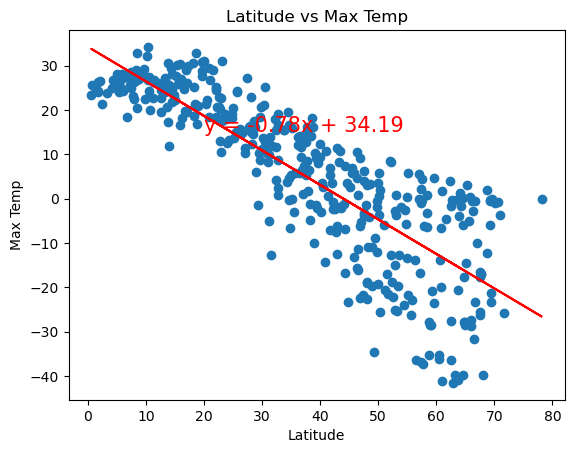

In [32]:
# Linear regression on Northern Hemisphere

# Extract x (Latitude) and y (Max Temp) values for regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Use the function to get regression values, equation, and R-squared
regression_values, equation, r_squared = myfunction(x_values, y_values)

# Print results
print(equation) 
print(f"The r^2-value is: {r_squared**2}")  # Use r_squared, not rvalue

# Create Scatter Plot
plt.scatter(x_values, y_values)  # Scatter plot of latitude vs. max temp
plt.plot(x_values, regression_values, "r-")  # Plot the regression line

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(equation, (20, 15), fontsize=15, color="red")  # Annotate the equation
plt.title("Latitude vs Max Temp")

# Show plot
plt.show()

y = 0.17x + 26.94
The r^2-value is: 0.19198806142874367


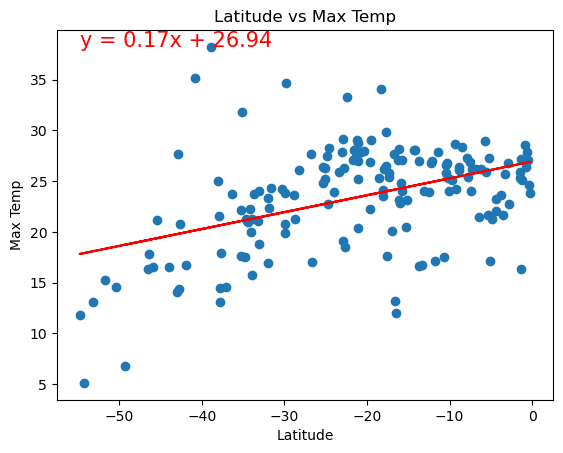

In [38]:
# Linear regression on Southern Hemisphere
# Extract x (Latitude) and y (Max Temp) 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Use the function to get regression values, equation, and R-squared
regression_values, equation, r_squared = myfunction(x_values, y_values)

# Print results
print(equation)
print(f"The r^2-value is: {r_squared**2}")

# Create Scatter Plot for Max Temp vs Latitude
plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(equation, (min(x_values), max(y_values)), fontsize=15, color="red")
plt.title("Latitude vs Max Temp")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

y = 0.45x + 56.41
The r^2-value is: 0.15389857363801304


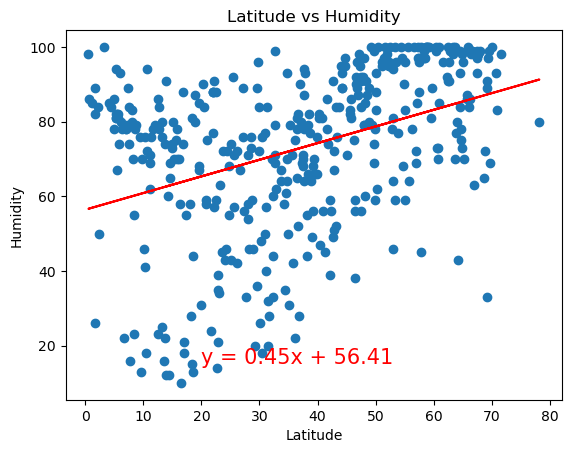

In [37]:
# Northern Hemisphere

# Extract x (Latitude) and y (Humidity) values for regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Use the function to get regression values, equation, and R-squared
regression_values, equation, r_squared = myfunction(x_values, y_values)

# Print results
print(equation) 
print(f"The r^2-value is: {r_squared**2}")

# Create Scatter Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(equation, (20, 15), fontsize=15, color="red")
plt.title("Latitude vs Humidity")

# Show plot
plt.show()

y = 0.56x + 87.11
The r^2-value is: 0.1816316598912154


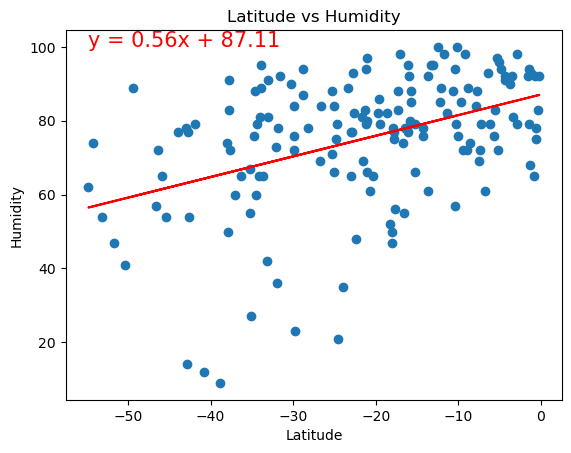

In [39]:
# Southern Hemisphere
# Extract x (Latitude) and y (Humidity)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Use the function to get regression values, equation, and R-squared
regression_values, equation, r_squared = myfunction(x_values, y_values)

# Print results
print(equation)
print(f"The r^2-value is: {r_squared**2}")

# Create Scatter Plot for Humidity vs Latitude
plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(equation, (min(x_values), max(y_values)), fontsize=15, color="red")
plt.title("Latitude vs Humidity")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.76x + 31.26
The r^2-value is: 0.13994475596105663


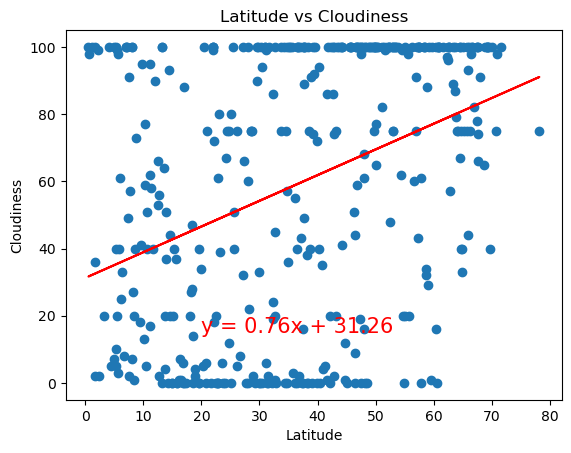

In [36]:
# Northern Hemisphere

# Extract x (Latitude) and y (Cloudiness) values for regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Use the function to get regression values, equation, and R-squared
regression_values, equation, r_squared = myfunction(x_values, y_values)

# Print results
print(equation) 
print(f"The r^2-value is: {r_squared**2}")

# Create Scatter Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(equation, (20, 15), fontsize=15, color="red")
plt.title("Latitude vs Cloudiness")

# Show plot
plt.show()

y = 1.04x + 77.13
The r^2-value is: 0.13853303857074525


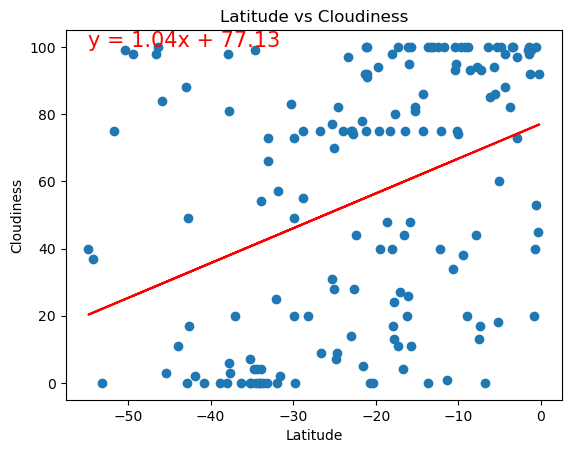

In [40]:
# Southern Hemisphere
# Extract x (Latitude) and y (Cloudiness) 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Use the function to get regression values, equation, and R-squared
regression_values, equation, r_squared = myfunction(x_values, y_values)

# Print results
print(equation)
print(f"The r^2-value is: {r_squared**2}")

# Create Scatter Plot for Cloudiness vs Latitude
plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(equation, (min(x_values), max(y_values)), fontsize=15, color="red")
plt.title("Latitude vs Cloudiness")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

y = -0.03x + 4.83
The r^2-value is: 0.037470182615032314


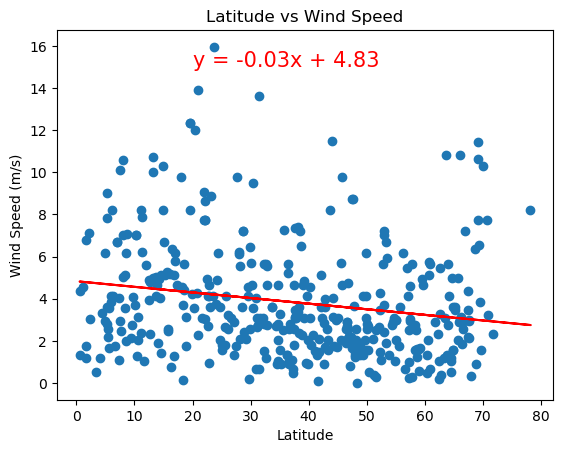

In [35]:
# Northern Hemisphere

# Extract x (Latitude) and y (Wind Speed) values for regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Use the function to get regression values, equation, and R-squared
regression_values, equation, r_squared = myfunction(x_values, y_values)

# Print results
print(equation) 
print(f"The r^2-value is: {r_squared**2}")  

# Create Scatter Plot
plt.scatter(x_values, y_values)  
plt.plot(x_values, regression_values, "r-")  

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.annotate(equation, (20, 15), fontsize=15, color="red")  
plt.title("Latitude vs Wind Speed")

# Show plot
plt.show()

y = -0.06x + 2.95
The r^2-value is: 0.07261517364137131


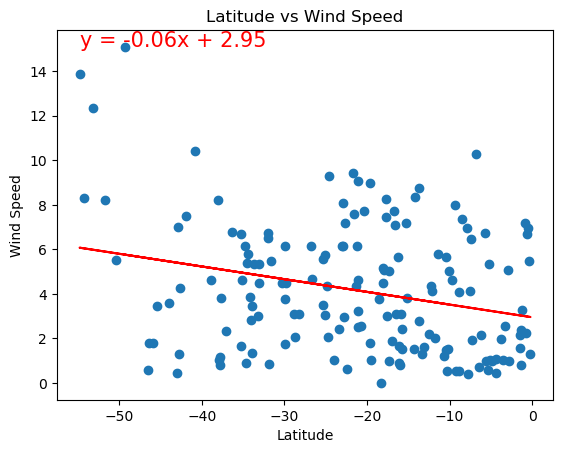

In [41]:
# Southern Hemisphere
# Extract x (Latitude) and y (Wind Speed)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Use the function to get regression values, equation, and R-squared
regression_values, equation, r_squared = myfunction(x_values, y_values)

# Print results
print(equation)
print(f"The r^2-value is: {r_squared**2}")

# Create Scatter Plot for Wind Speed vs Latitude
plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(equation, (min(x_values), max(y_values)), fontsize=15, color="red")
plt.title("Latitude vs Wind Speed")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE